## Win_Prediciton

In [1]:
import os
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:/DATA SCIENCE/Capstone Project/Win Prediction")

In [3]:
fullraw = pd.read_csv("Win_Prediction_Data.csv")

## EXPLORATORY DATA ANALYSIS ###########



In [4]:
fullraw.head(15)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,27-Mar-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,25-Sep-12,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,1-Aug-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,28-Apr-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,3-Jun-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,24-May-11,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,3-Nov-11,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,17-Sep-12,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,11-Apr-12,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,17-Nov-11,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [5]:
fullraw.describe()

,Deal Cost
count,1.006100e+04
mean,7.668969e+05
std,1.619894e+06
min,0.000000e+00
25%,1.897059e+05
50%,3.823529e+05
75%,7.647059e+05
max,3.676471e+07


In [6]:
fullraw.dtypes

Client Category      object
Solution Type        object
Deal Date            object
Sector               object
Location             object
VP Name              object
Manager Name         object
Deal Cost           float64
Deal Status Code     object
dtype: object

In [7]:
fullraw['Client Category'].value_counts()

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

### <+>Missing Value Treatment  

#### Checking for Missing Values 

In [8]:
import numpy as np

fullraw.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

#### Checking Null Values

In [9]:
fullraw.notnull().sum()

Client Category      9982
Solution Type       10061
Deal Date           10061
Sector              10061
Location            10061
VP Name             10061
Manager Name        10061
Deal Cost           10061
Deal Status Code    10061
dtype: int64

#### Visualise Missing Values 

<AxesSubplot:>

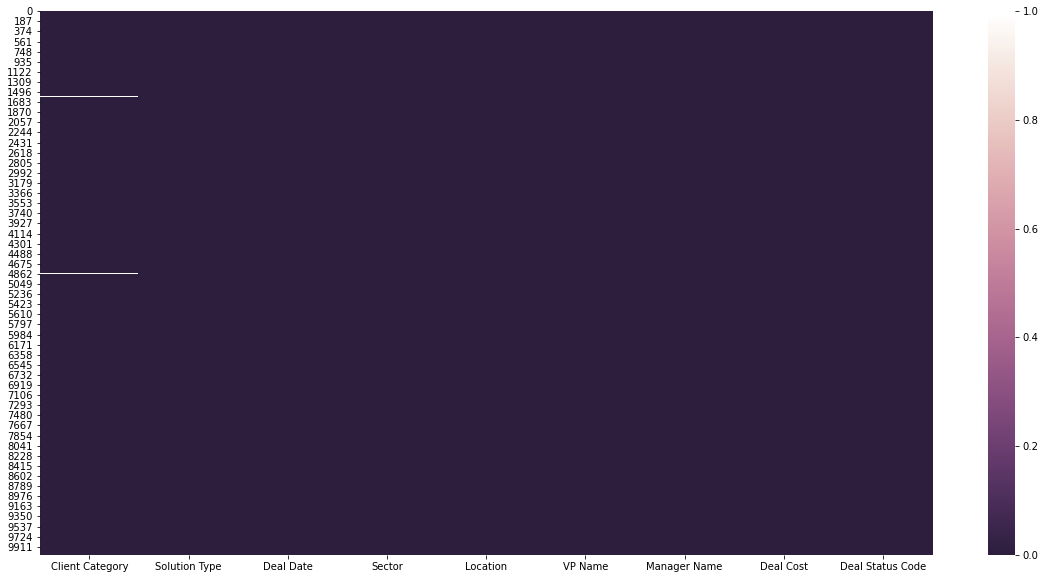

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib','inline')

plt.figure(figsize = (20,10))

cmap= sns.cubehelix_palette(light=1, as_cmap=True, reverse= True)

sns.heatmap(fullraw.isnull(), cmap=cmap)

#### Replacing Missing Values with Mode_Value

In [11]:
fullraw['Client Category'] = fullraw['Client Category'].fillna(fullraw['Client Category'].mode()[0])

In [12]:
fullraw.isnull().sum()

Client Category     0
Solution Type       0
Deal Date           0
Sector              0
Location            0
VP Name             0
Manager Name        0
Deal Cost           0
Deal Status Code    0
dtype: int64

#### Plot after Treating Missing Values

<AxesSubplot:>

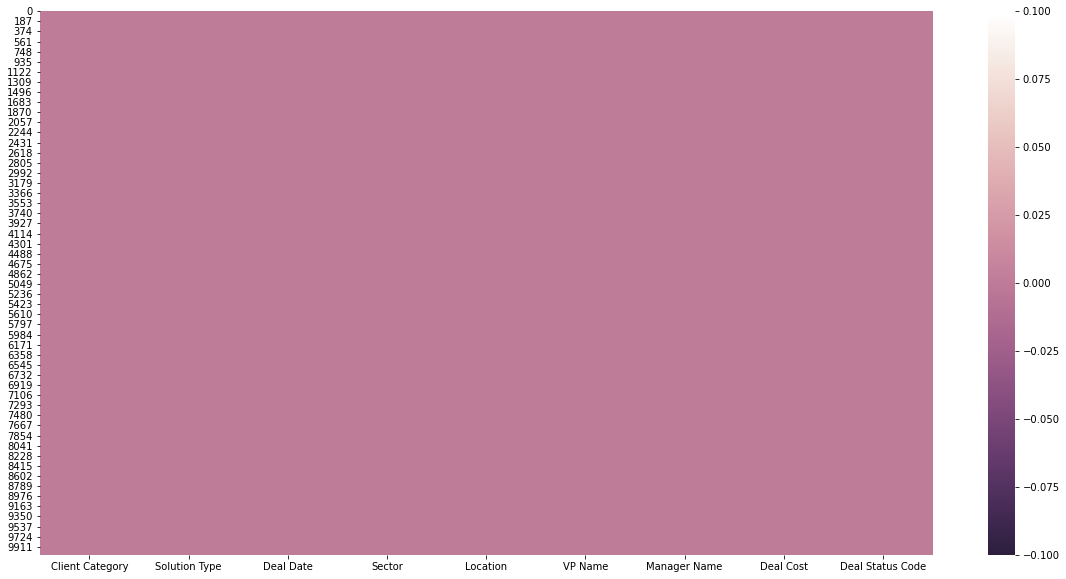

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(fullraw.isnull(), cmap= cmap)

In [14]:
fullraw['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

## Visualization

<AxesSubplot:xlabel='Deal Status Code', ylabel='count'>

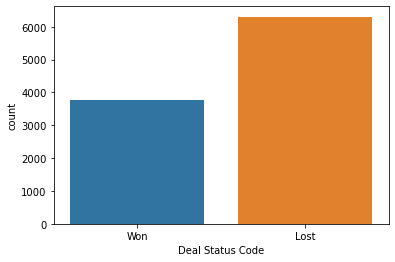

In [15]:
sns.countplot(fullraw['Deal Status Code'])

<AxesSubplot:xlabel='Client Category', ylabel='count'>

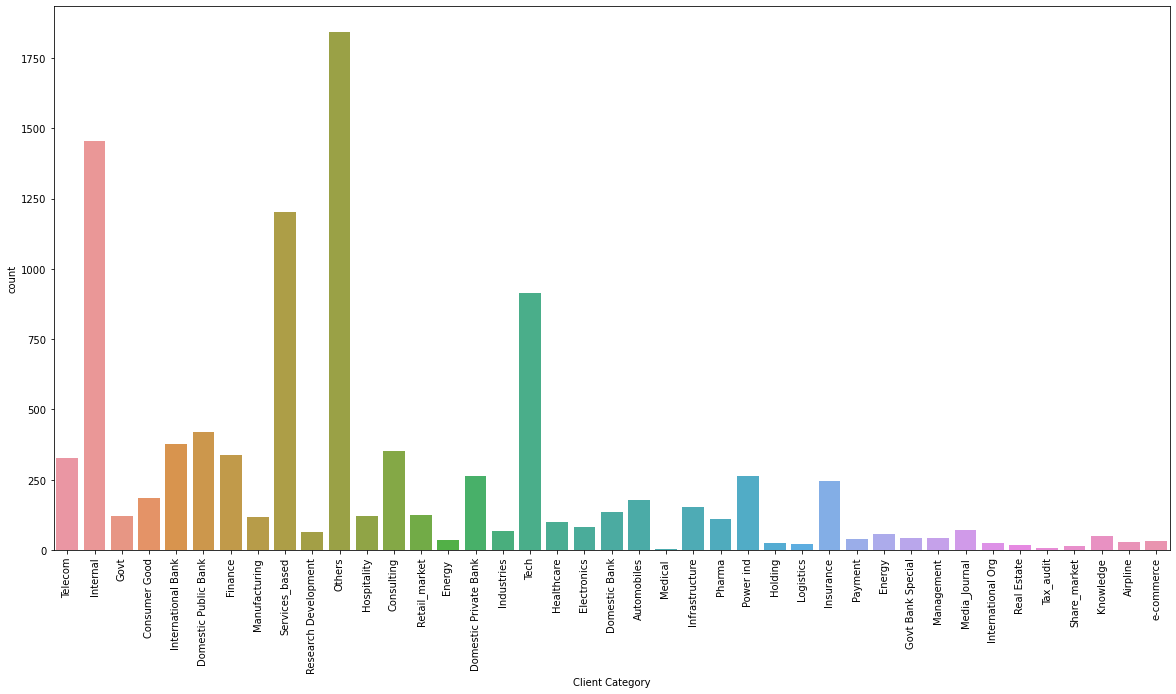

In [16]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.countplot(fullraw['Client Category'])

<AxesSubplot:xlabel='Location', ylabel='count'>

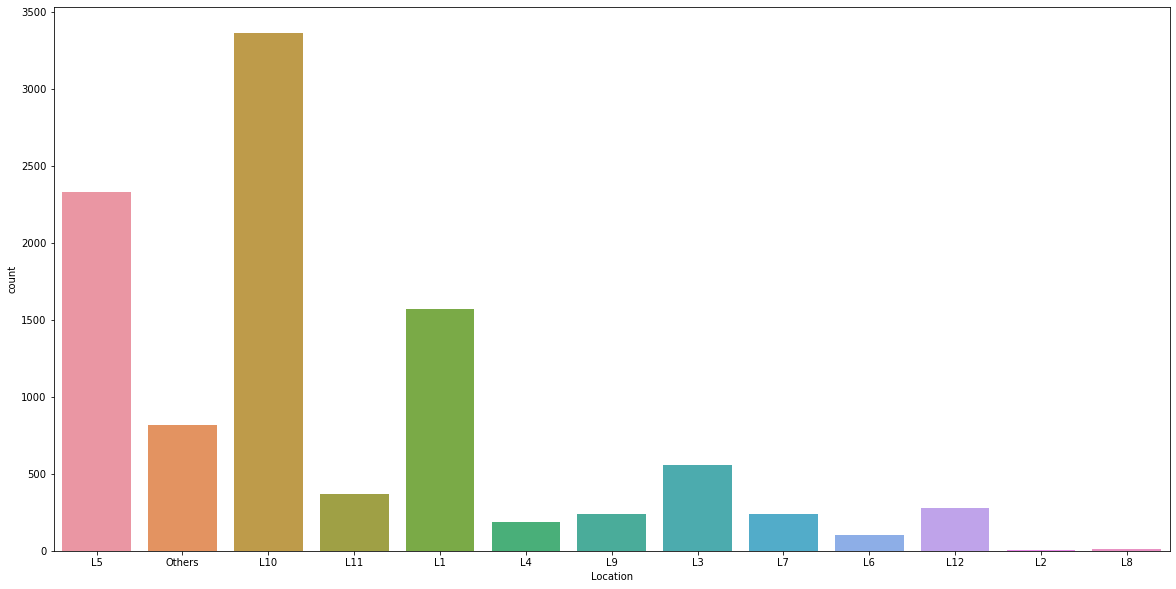

In [17]:
plt.figure(figsize = (20,10))
sns.countplot(fullraw['Location'])

<AxesSubplot:xlabel='Sector', ylabel='count'>

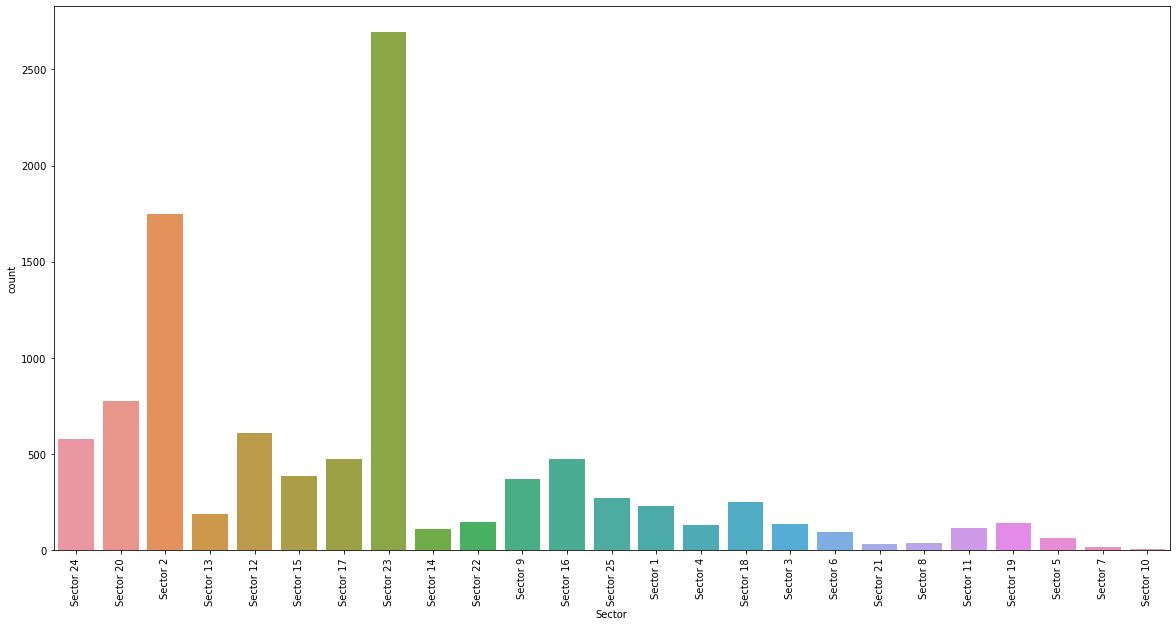

In [18]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.countplot(fullraw['Sector'])

<AxesSubplot:xlabel='VP Name', ylabel='count'>

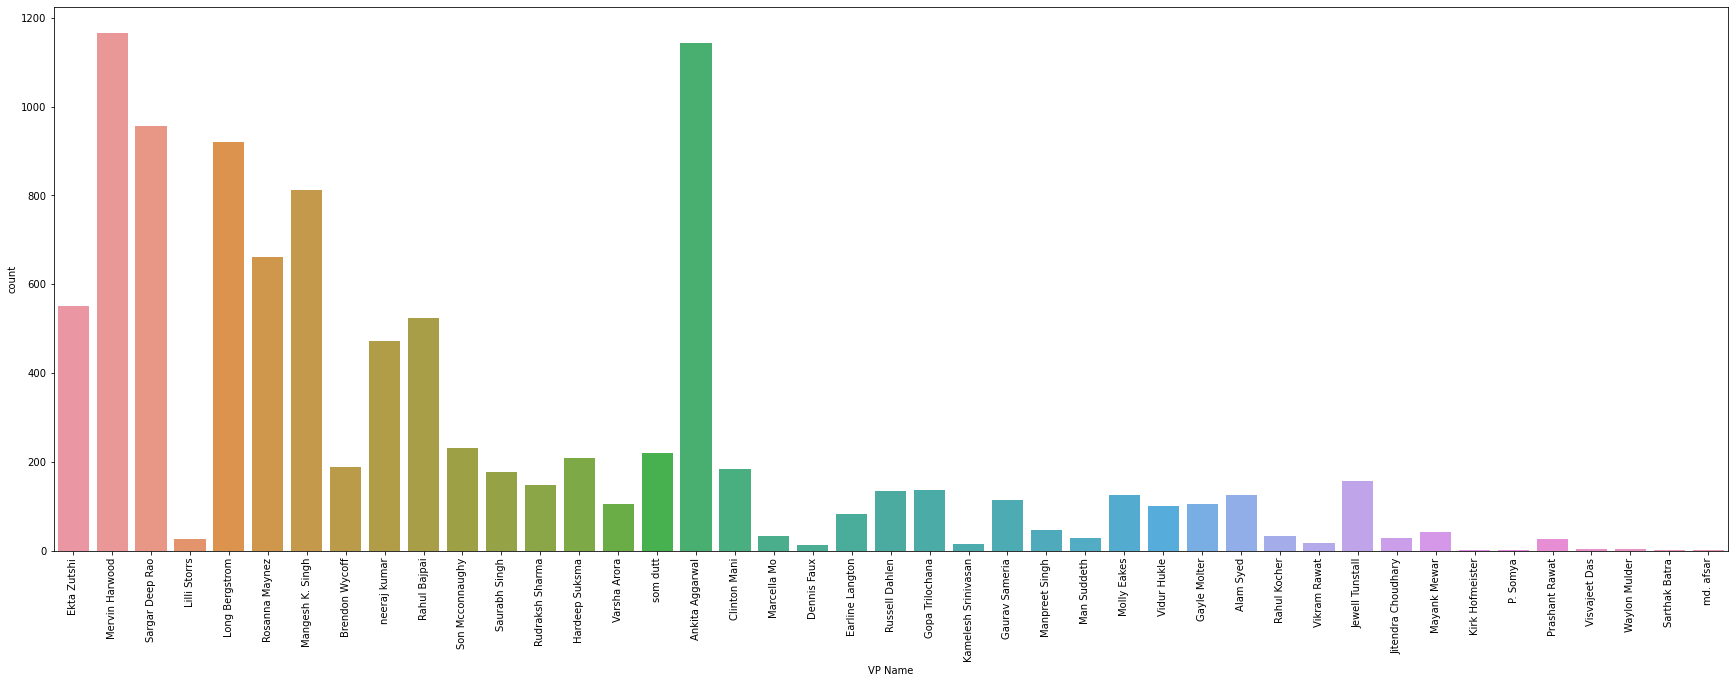

In [19]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
sns.countplot(fullraw['VP Name'])

<AxesSubplot:xlabel='Deal Cost', ylabel='Count'>

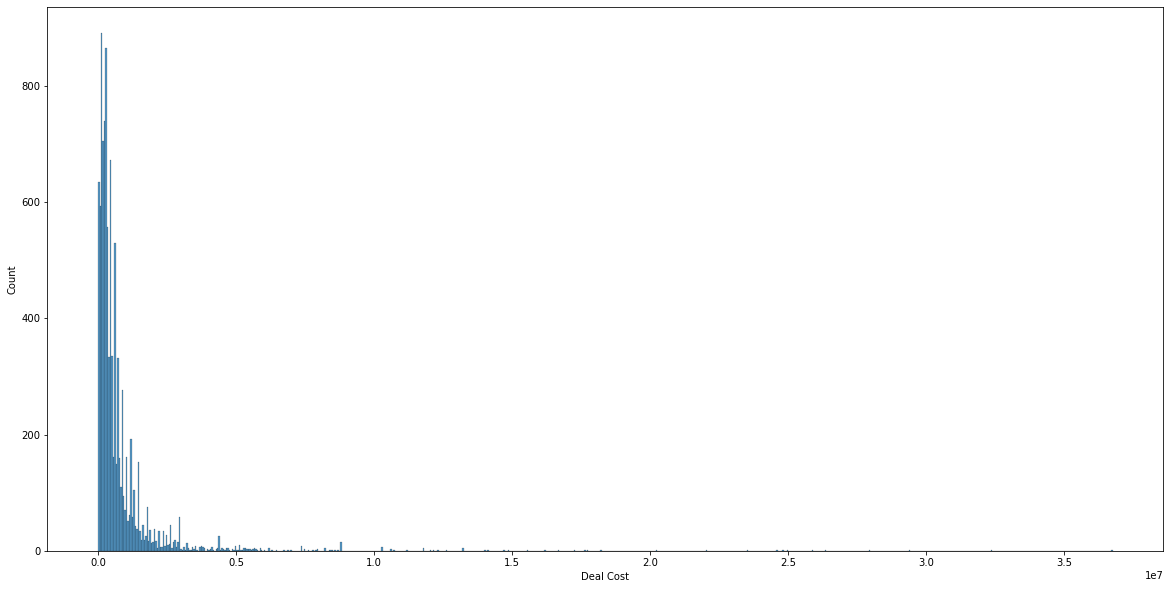

In [20]:
plt.figure(figsize = (20,10))
sns.histplot(fullraw['Deal Cost'])

<AxesSubplot:xlabel='Deal Cost'>

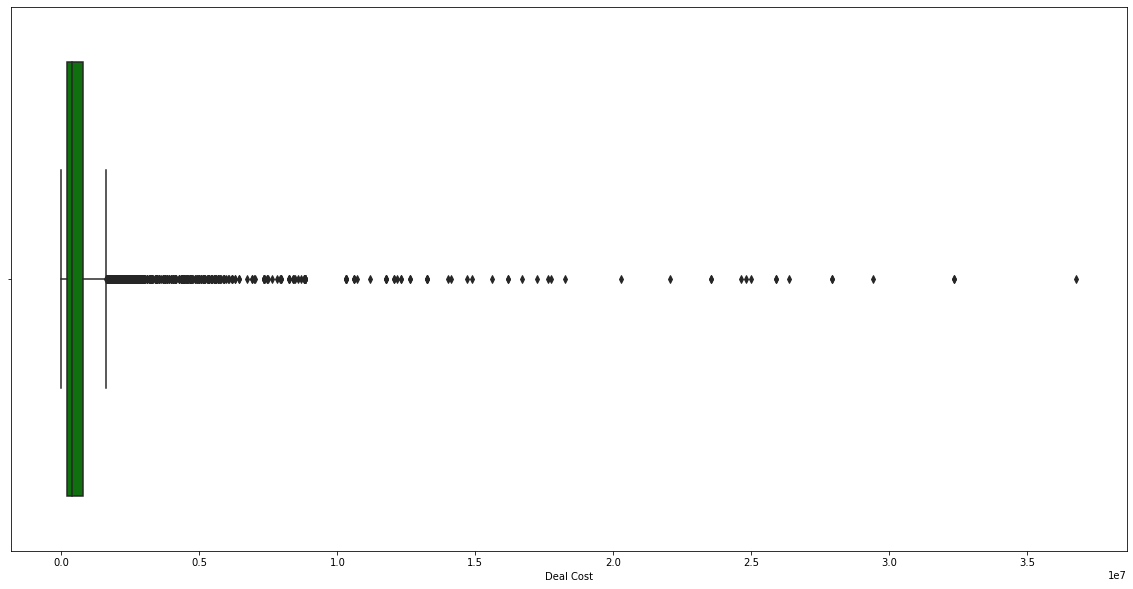

In [23]:
plt.figure(figsize = (20,10))
sns.boxplot(fullraw["Deal Cost"], orient = "h", color = "green")